# Introduction:
This is a demonstration of __ChoroPie__, a Basemap/Matplotlib toolkit I created which allows the simplified creation of choropleth maps with colorbars using shapefiles, and the combined plotting of pie charts within the centroid coordinates of the shapefile's polygons.

The library can be installed with pip using _pip install choropie_

#### The final output:
<img src="https://user-images.githubusercontent.com/30331170/33050018-b200156e-ce30-11e7-9ffa-b58885df2062.png" width="50%"/>

##### Url to Github repo:
https://github.com/vinceniko/choropie

###### *Disclaimer: The colors used to present the racially focused data is not reflective of any kind of idealogy. I realize that some may find the use of these colors to be offensive, but no offense was implied or intended. The chosen colors are merely used to better explain the concepts being introduced below.

# imports

In [247]:
import numpy as np
import pandas as pd
import os
import datetime as dt

from choropie import ChoroPie as cp

# state names and abbreviations

In [248]:
dict_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MP': 'Northern Mariana Islands',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NA': 'National',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

# import general state population dataset and remove first three rows

In [249]:
df_pop = pd.read_excel('Data/state_population_estimates.xlsx', skiprows=3)  # taken from census data

In [250]:
df_pop.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016
0,United States,308745538.0,308758105.0,309348193.0,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0
1,Northeast,55317240.0,55318353.0,55388056.0,55632766.0,55829059.0,55988771.0,56116791.0,56184737.0,56209510.0
2,Midwest,66927001.0,66929825.0,66978602.0,67153331.0,67332320.0,67543948.0,67726368.0,67838387.0,67941429.0
3,South,114555744.0,114563005.0,114863114.0,116061801.0,117299171.0,118424320.0,119696311.0,121039206.0,122319574.0
4,West,71945553.0,71946922.0,72118421.0,72815460.0,73537829.0,74247869.0,75023986.0,75834288.0,76657000.0


# to remove '.' in front of state in df_pop

In [251]:
def remove_period(x):
    if isinstance(x, str) and x[0] == '.':
        x = x.replace('.', '')
        return x


df_pop.iloc[:, 0] = df_pop.iloc[:, 0].apply(remove_period)  # perform remove_period

In [252]:
df_pop.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016
0,None,308745538.0,308758105.0,309348193.0,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0
1,None,55317240.0,55318353.0,55388056.0,55632766.0,55829059.0,55988771.0,56116791.0,56184737.0,56209510.0
2,None,66927001.0,66929825.0,66978602.0,67153331.0,67332320.0,67543948.0,67726368.0,67838387.0,67941429.0
3,None,114555744.0,114563005.0,114863114.0,116061801.0,117299171.0,118424320.0,119696311.0,121039206.0,122319574.0
4,None,71945553.0,71946922.0,72118421.0,72815460.0,73537829.0,74247869.0,75023986.0,75834288.0,76657000.0


# select necessary state rows and correct year

In [253]:
series_pop = df_pop.set_index(df_pop.columns[0]).loc['Alabama':'Wyoming', 2016]
series_pop.name = 'population'

In [254]:
series_pop.head()

Unnamed: 0
Alabama        4863300.0
Alaska          741894.0
Arizona        6931071.0
Arkansas       2988248.0
California    39250017.0
Name: population, dtype: float64

# import police killings dataset

In [255]:
df_killings = pd.read_csv('Data/PoliceKillingsUS.csv', encoding="latin1") # set proper encoding or get error. i combined the sheets into one file here

In [256]:
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# replace race abbreviations

In [257]:
def abr(x):
    try:
        if x[0] == 'A':
            return "Asian"
        if x[0] == 'B':
            return "Black"
        if x[0] == 'H':
            return "Hispanic"
        if x[0] == 'N':
            return "Native American"
        if x[0] == 'O':
            return "Ocean Pacific"
        if x[0] == 'W':
            return "White"
    except Exception:
        return None


df_killings['race'] = df_killings['race'].apply(abr)

In [258]:
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


# use datetime module to extract min and max dates of dataset

In [259]:
# format dates to Jan. 01, 06 format
# used for title of plot
max_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).max().strftime('%b. %d, %y')
min_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).min().strftime('%b. %d, %y')

# series breaking down count of killings by state

In [260]:
series_state = df_killings.groupby('state').count()['id']
series_state.rename('counts', inplace=True)

state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: counts, dtype: int64

# series breaking down count of killings by state and race (MultiIndex)

In [261]:
series_race = df_killings.groupby(['state', 'race']).count()['id']

In [262]:
series_race.head()

state  race           
AK     Black               1
       Native American     6
       White               7
AL     Black              14
       White              32
Name: id, dtype: int64

# percentage of each race killed by state

In [263]:
series_state_crime_race_percs = series_race / \
    series_race.groupby('state').sum() * 100

In [264]:
def set_index_states(df):
    if isinstance(df.index, pd.MultiIndex):
        list_abb = [dict_states[abb] for abb in df.index.levels[0]]
        df.index.set_levels(list_abb, level=0, inplace=True)
    elif isinstance(df.index, pd.Index):
        list_abb = [dict_states[abb] for abb in df.index]
        df.index = list_abb


# fix indexes (replace state abbreviations with state name)
# series_race and series_state
set_index_states(series_race)
set_index_states(series_state)

In [265]:
series_race.head()

state    race           
Alaska   Black               1
         Native American     6
         White               7
Alabama  Black              14
         White              32
Name: id, dtype: int64

In [266]:
series_state.head()

Alaska         15
Alabama        50
Arkansas       26
Arizona       118
California    424
Name: counts, dtype: int64

# df_state is the first df we will use for plotting

In [267]:
df_state = pd.concat([series_state, series_pop], axis=1)
# per capita percentage
df_state['per_capita'] = df_state['counts'] / df_state['population']

In [268]:
df_state.head()

,counts,population,per_capita
Alabama,50,4863300.0,0.000010
Alaska,15,741894.0,0.000020
Arizona,118,6931071.0,0.000017
Arkansas,26,2988248.0,0.000009
California,424,39250017.0,0.000011


# intermediary step

In [269]:
# population by race for each state
df_state_race = pd.read_excel('Data/state_race.xlsx', index_col=0)

df_state_race = df_state_race.iloc[1:, :]
df_state_race.columns.name = 'race'

# transform columns into multiindex
df_massaged = pd.melt(df_state_race.reset_index(),
                      id_vars='Geography', value_vars=df_state_race.columns)
df_massaged = df_massaged.groupby(
    ['Geography', 'race']).agg(lambda x: x.iloc[0])

In [270]:
df_massaged.head()

value
Geography race                   
Alabama   Asian              1590
          Black             15233
          Hispanic         203845
          Mixed              6966
          Native American    6755

# df_race is the second df we will use for plotting

In [271]:
df_race = pd.concat([series_race, series_state_crime_race_percs,
                     df_massaged], axis=1).dropna()
df_race.columns = ['count', 'percs', 'pop']  # count, percent, population
df_race['per_capita'] = df_race['count'] / df_race['pop']

###################

In [272]:
df_race.head()

count      percs     pop  per_capita
Alabama Black             14.0  30.434783   15233    0.000919
        White             32.0  69.565217  170587    0.000188
Alaska  Black              1.0   7.142857    2955    0.000338
        Native American    6.0  42.857143    5288    0.001135
        White              7.0  50.000000   36474    0.000192

# shp file processing

In [273]:
shp_file = 'Data/cb_2016_us_state_500k/cb_2016_us_state_500k'

shp_lst = cp.get_shp_attributes(shp_file)
shp_key = cp.find_shp_key(df_state.index, shp_lst)  # which shp attribute holds our index values
###

basemap = dict(
    basemap_kwargs=dict(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
                        urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95),
    shp_file=shp_file,
    shp_key=shp_key,
    figsize=(22, 12),
)

choro = dict(
    num_colors=8,
    cmap='hot_r',
    color_data=df_state['counts'],
)

pie = dict(
    size_data=df_state['per_capita'],
    size_ratios=df_race['per_capita'],
    pie_data=df_race['percs'],
    pie_dict={'Asian': 'cyan', 'Black': 'blue', 'Hispanic': 'green',
              'Native American': 'purple', 'Ocean Pacific': 'red', 'White': '0.75'},
    scale_factor_size=1,
    scale_factor_ratios=1 / 2
)

/anaconda/envs/choropie/lib/python3.6/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


# Arguments Explained:
Where color_data and size data are Pandas single-index series with the area_names used in the shp file as the index.  
Ie.  

area_name | per capita rate
--- | ---
alabama | .000010
alaska | .000020
arizona | .000017

Where pie_data and size_ratios are Pandas multi-index series with the area_names used in the shp file as the first index, and the pie chart slices (the ones passed into the pie_dict parameter), as the second index. 
Ie.

area_name | race | per-race rate
--- | --- | ---
alabama | black | 0.000919
alabama | white | 0.000188
alaska | black | 0.000338
alaska | native american | 0.001135
alaska | white | 0.000105

##### Notes-   
* The ChoroPie class inherits directly from Basemap.
* Pie plotting is optional. If pies are plotted, both size_data and size_ratios are optional. Not all pies have to be plotted as well (if it gets too cluttered...though in that case you can call the zoom_to_area method).  
* Choropleth plotting is optional.  
* The pie_dict parameter selects the colors for each pie slice.  


# create ChoroPie object

In [274]:
m = cp.ChoroPie(**basemap)

# plot choropleths

In [275]:
m.choro_plot(**choro)

# plot pies

In [276]:
m.pie_plot(**pie)

# insert colorbar

In [277]:
m.insert_colorbar(colorbar_title='Map: Count of Killings',
                     colorbar_loc_kwargs=dict(location='right'))

# insert legend for pie charts

In [278]:
m.insert_pie_legend(legend_loc='lower right',
                       pie_legend_kwargs=dict(title='Pies: Racial Breakdown'))

# set title

In [279]:
m.ax.set_title('Police Killings: {} - {}\nTotal: {:,d}'.format(min_date, max_date,
    df_killings.iloc[:, 0].count()), fontsize=35, fontweight='bold', x=0.61, y=0.90)

# ticks of the colorbar

In [280]:
m.ax_colorbar.set_yticklabels(['{:.0f}'.format(
    float(i.get_text())) for i in m.ax_colorbar.get_ymajorticklabels()])

# display the map 

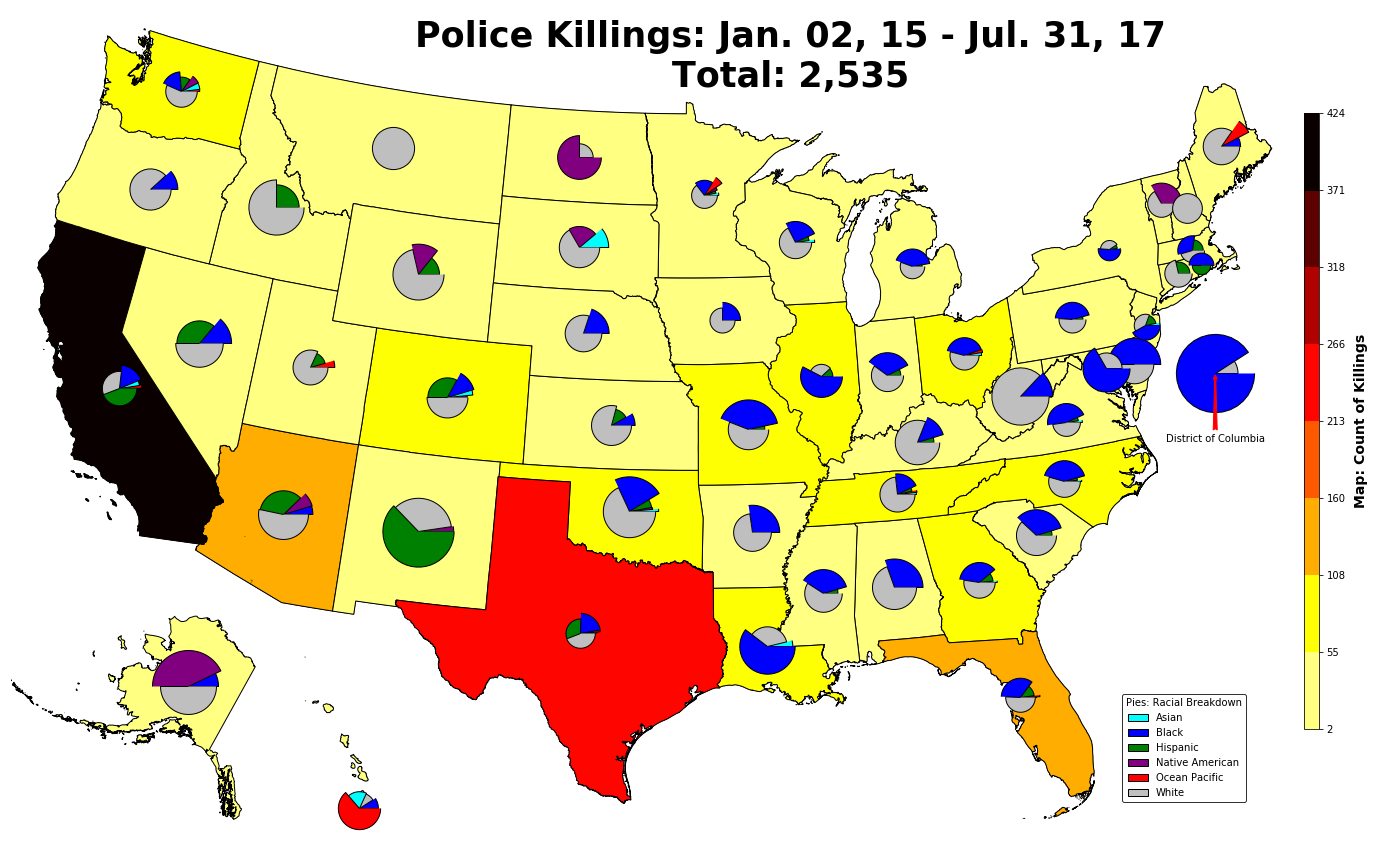

In [281]:
m.fig

# Conclussions:

### Results:
By examining the results we can see that:
1. California has had the most police killings.  
2. California has not had the highest per capita rate of police killings, with states such as New Mexico edging out ahead.  
3. In most states, the race with the most deaths were whites.  
4. Despite that, in states such as Oklahoma and Missiori, more blacks were killed proportionally when adjusted for the population differences of each race.  

# Other examples:

Without size_data:  
<img src="https://user-images.githubusercontent.com/30331170/33050049-ebfc0cd2-ce30-11e7-92df-84269f423ea8.png" width="60%" />

With size_data:  
<img src="https://user-images.githubusercontent.com/30331170/33052907-04c44316-ce3f-11e7-9bb0-d3c426502de4.png" width="60%" />
